# Lab 5: Unsupervised Learning I - Clustering

In this lab, we will cover the following topics:
1. Review of algorithms:
   * k-Means
   * Hierarchical (agglomerative)
2. Coding it up:
   * k-Means
   * Hierarchical (agglomerative)
2. Visualization and interpretation of clusters
3. Hyperparameter tuning

Each section includes basic implementation and questions for further exploration.

## 1. Review: Algorithms

### 1.1 k-Means Clustering  
**Definition:**  
k-Means is a centroid-based clustering algorithm that partitions data into `k` clusters by minimizing intra-cluster variance.
KNN uses existing data for training (supervised) and then clusters new data (predictive), whereas k-means is making mean-based clusters based on patterns in presented data (unsupervised; no training, no predictions).

**Algorithm Steps:**  
1. **Initialize** `k` cluster centroids randomly.  
2. **Assign** each data point to the nearest centroid.  
3. **Update** centroids by reassigning to 'the mean of all data points in the cluster'.  
4. **Repeat** steps 2-3 until convergence (no further changes in centroids; all data points still assigned to same centroid after update).  

**Key Considerations:**  
- **Strengths:** Scalable, efficient for _large datasets_, easy to interpret.  
- **Limitations:** Assumes spherical clusters, sensitive to initialization & `k` selection.  (initialisation = initial centroid placement)
- **Best for:** Well-separated, compact, convex clusters.  

![k-Means Animation](kmeans.gif)

---

### 1.2 Hierarchical (Agglomerative) Clustering  
**Definition:**  
A bottom-up approach where each point starts as its own cluster, and clusters are iteratively merged based on similarity.

**Algorithm Steps:**  
1. **Start** with each data point as an individual cluster.  
2. **Merge** the closest clusters based on a linkage criterion:  
   - **Single Linkage:** Merge clusters with the closest pair of points.  
   - **Complete Linkage:** Merge clusters with the farthest pair of points. 
   - **Average Linkage:** Merge clusters based on the average distance between all points.  

Complete Linkage eg: 
First: merge 3+5 bc they have the closest distance.
Second: comparing 35 + 1, 3v1 has distance 5 but 5v1 has a distance 9, so we go with 35v1 having a distance of 9. If there are any other cluster matches with a distance less than 9, those points will be preferably clustered over 35v1.
By comparison, Single Linkage would merge based on the shortest distance bw clusters' data points, so 35v1 == distance of 5.

3. **Repeat** until only one cluster remains or a stopping criterion is met.  

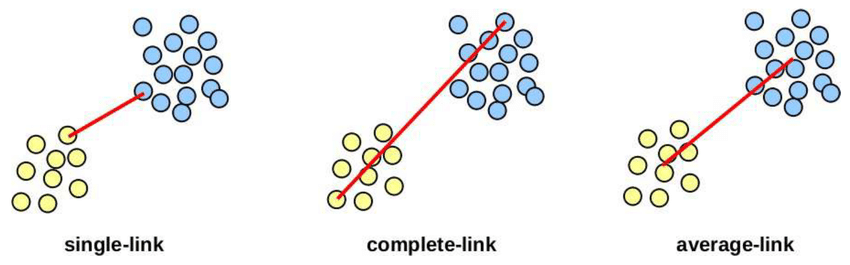


**Key Considerations:**  
- **Strengths:** No need to specify `k`, captures hierarchical relationships.  
- **Limitations:** Computationally expensive, sensitive to linkage type.  
- **Best for:** _Small-to-medium datasets_, exploring cluster hierarchy.  

The y-axis shows the distance bw the clusters at the time of merging.

![Agglomerative Clustering Animation](hierarch.gif)

---

## Key Differences  

| Feature               | k-Means                     | Hierarchical Clustering (Agglomerative) |
|-----------------------|----------------------------|-----------------------------------------|
| **Approach**         | Partition-based, centroid-driven | Hierarchical, distance-driven |
| **Cluster Shape**    | Prefers spherical clusters | Can detect various cluster shapes |
| **Number of Clusters** | Must predefine `k` | Dendrogram can help determine `k` |
| **Scalability**      | Efficient for large datasets | Computationally expensive for large `n` |
| **Result Type**      | Hard assignments | Hierarchical tree (dendrogram) |

---

📌 **When to Use Which?**  
- Use **k-Means** when you need fast, efficient clustering for large datasets with well-separated groups.  
- Use **Hierarchical Clustering** when you want to analyze **cluster relationships** and don't want to predefine `k`.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

def plot_clustering_results(X, labels, centers, silhouette_avg, n_clusters=4):
    """
    Plots the clustering results and the silhouette scores for each sample.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    labels : array-like, shape (n_samples,)
        The cluster labels for each data point.
    centers : array-like, shape (n_clusters, n_features), optional
        The coordinates of the cluster centers. If None, no centers are plotted.
    silhouette_avg : float
        The average silhouette score for all the samples.
    n_clusters : int, optional, default=4
        The number of clusters.

    Returns:
    None
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # Plot the clustering result
    ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    if centers is not None:
        ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Clustering Result')

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

## 2. Clustering Algorithms

### 2.1 k-Means Clustering

We will start by implementing k-Means clustering. We will also explore different parameters and visualize the results.


c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.40903453535240913


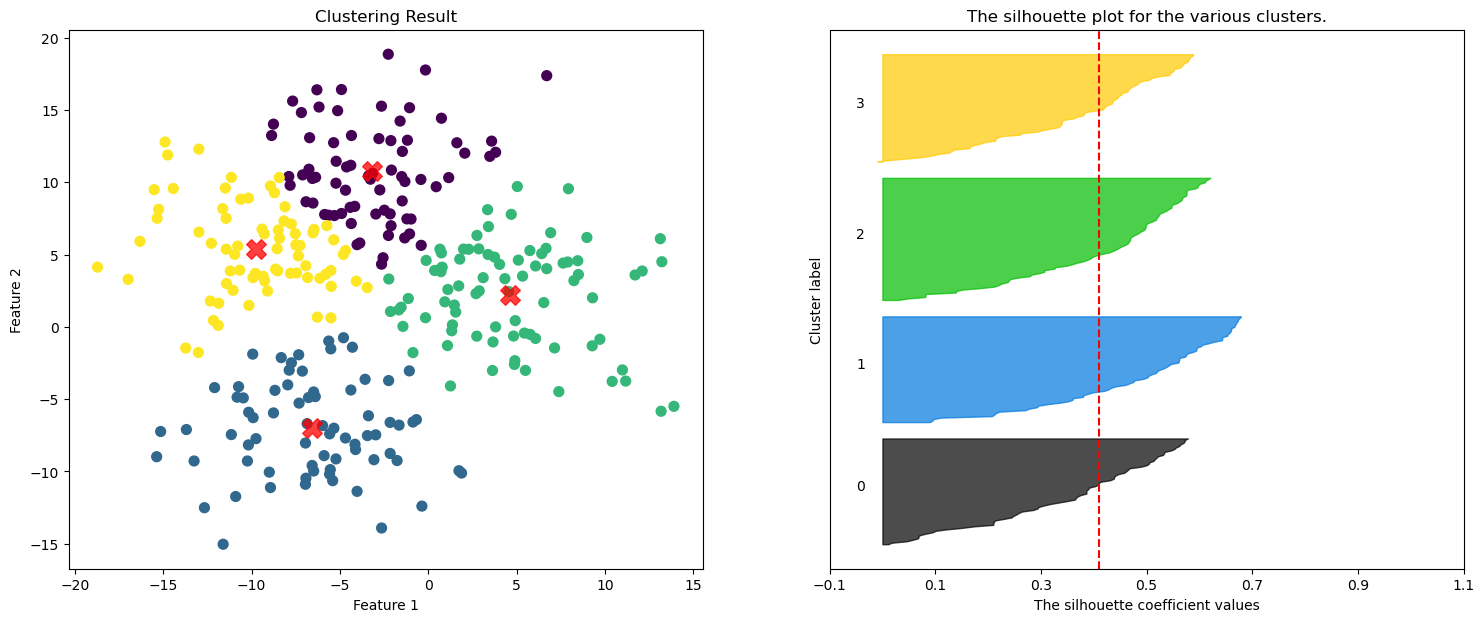

In [ ]:

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=4, random_state=42)
#mk blobs like mk classification

# do we ever use this y ?

# Train a k-Means clustering model
# INITIALISE, FIT, PREDICT
kmeans = KMeans(n_clusters=4, max_iter=14, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# there is no y_test//y_predict bc this is unlabeled data that the model is classifying
# only y is the kmeans output 

# Evaluate the model
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X, y_kmeans, centers, silhouette_avg, n_clusters=4)


# Silhouette Scores
KMeans?
silhouette_score?

Silhouette Score : measures how well data point fits in their own cluster vs in other clusters; quantitatively determine goodness of fit.
Scales [-1, 1], wherein:
- (-) == bad classification
- (+), higher magnitude == clusters well assigned
- Value of k that maximises avg silhouette score == best choice.

Each data point in the scatter plot represented by a horizontal line in the silhouette plot with a length proportional to the silhouette coefficient for that data point. These are aggregated for overall silhouette score.

If you see bars going into negative coefficient territory, those are data points that are not so well assigned or may be in ambigous border areas between clusters.
Although we care about the overall silhouette score, we must not overly depend on scores to the point where the model no longer reflects the underlying data.

### Questions for Exploration

1. How does changing the number of clusters (`n_clusters`) affect the clustering results?
- when increasing n_clusters of k_means to be more than n_clusters of the data in make_blobs, the extra clusters have very thin silhouettes
2. What happens to the silhouette score when you increase `max_iter`?
- increasing max_iter (to larger than n_clusters) changes the centroid positions,  resulting in silhouettes that are more evenly shaped and a slightly higher silhouette score.
- However, this eventually hits a maxim past which further increasing the max_iter has no effect.
3. How does the clustering performance change if you use a different random seed for data generation or change the initialization?

### 1.2 Hierarchical Clustering

Next, we will implement hierarchical clustering. We will also explore different parameters and visualize the results.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [ ]:
linkage? 
# returns linkage matrix as ndarray --> plotted using dendogram
AgglomerativeClustering? 
# has linkage parameter (default 'ward'), dont need to run with linkage() function
# #can perform agglom clust independently or on 'precomputed' distance matrix
# above egs, linkage & AC used independently to create dendogram vs silhouette matrix

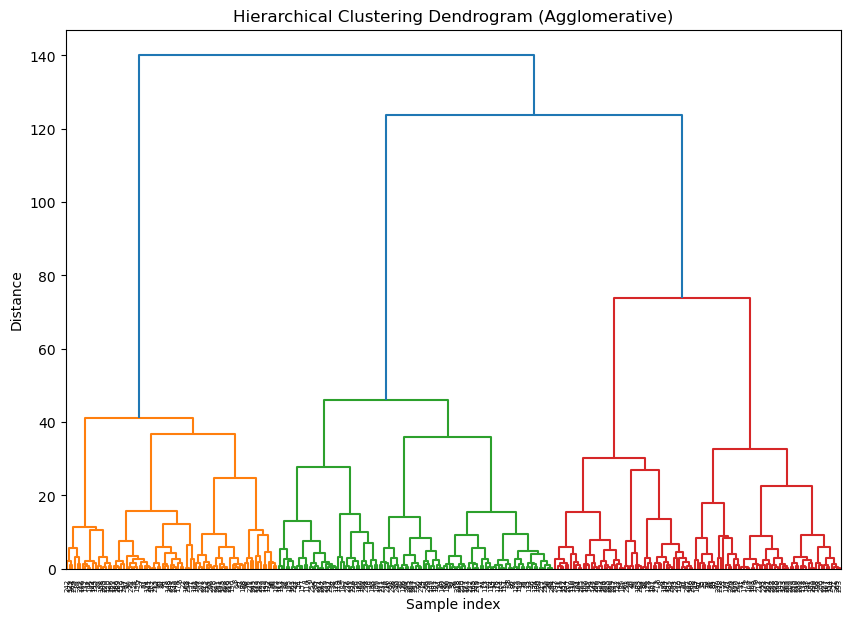

Silhouette Score: 0.3664200612982188


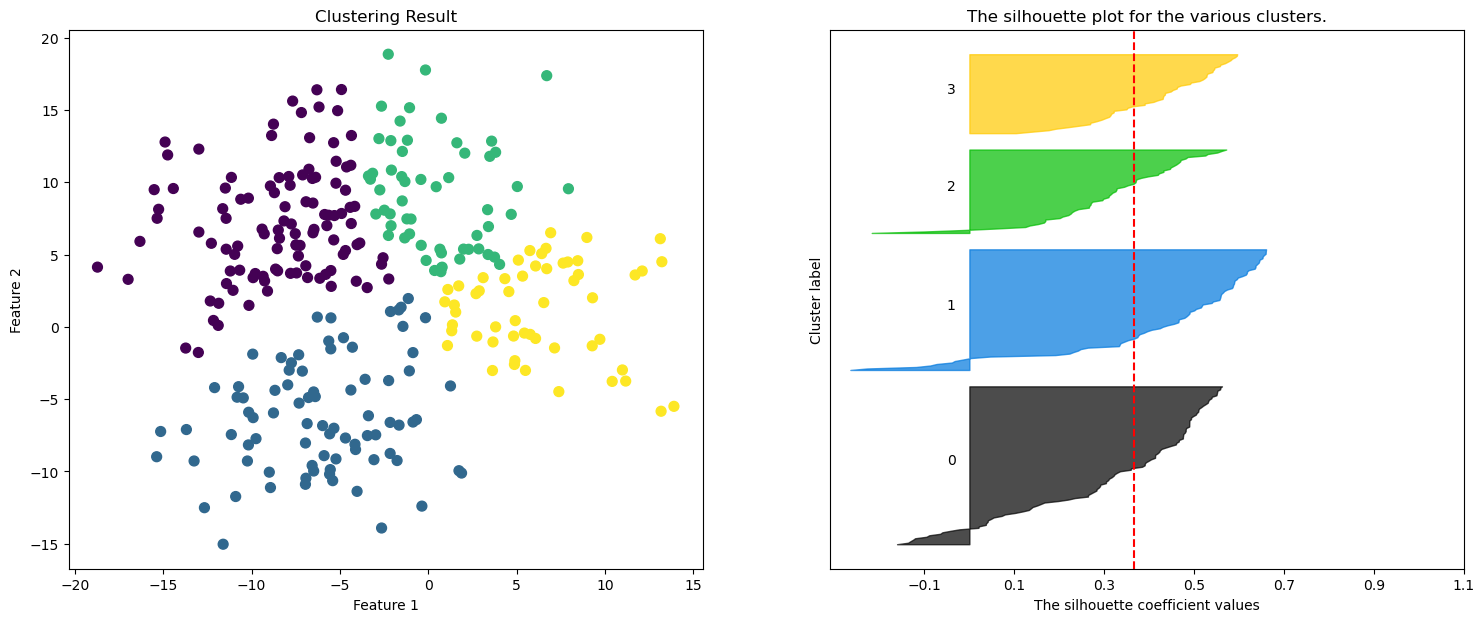

In [69]:

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=4, random_state=42)

# Perform agglomerative clustering
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Agglomerative)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Train an agglomerative clustering model
# instantiate, fit, predict
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X)

# Evaluate the model
silhouette_avg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X, y_agg, None, silhouette_avg, n_clusters=4)


# Questions for Exploration

### 1. How does changing the linkage criterion (e.g., `single`, `complete`, `average`, `centroid`) affect the clustering results?
1. 'ward'
2. 'single' dendrogram makes no sense, super congested.
3. 'complete' dendrogram is interpretable, different division into the three main branches and different distance results than 'ward'.
4. 'average' has outliers not in any of the three main branches, and then bracnhes are unevenly split, similar to 'complete'.
5. 'centroid' has only two main branches along with an outlier that doesnt converge till very late.

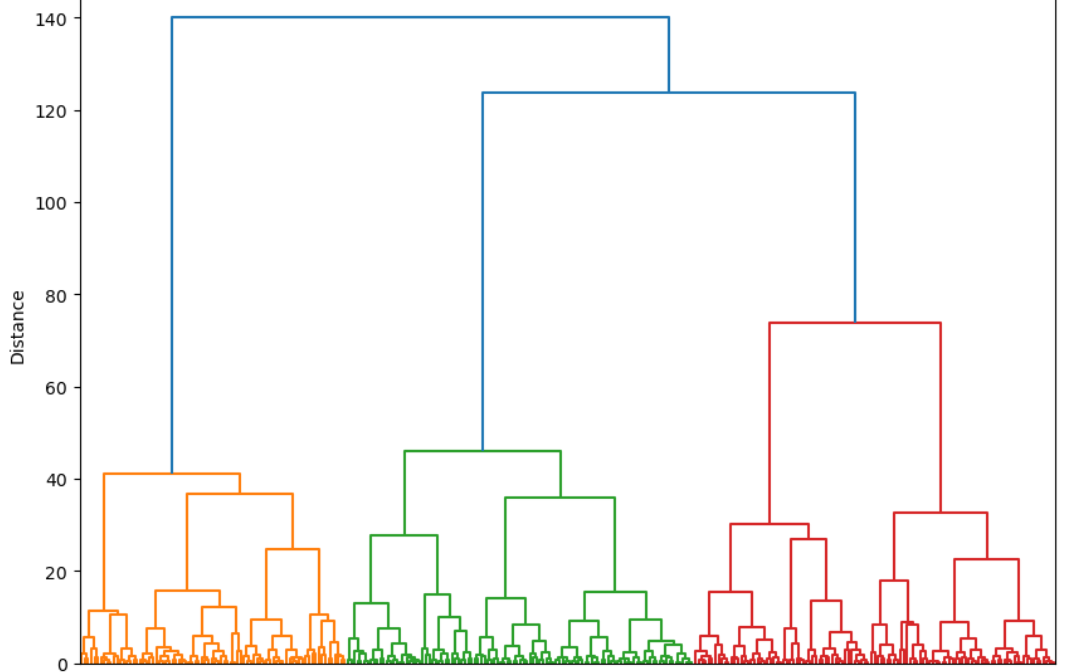
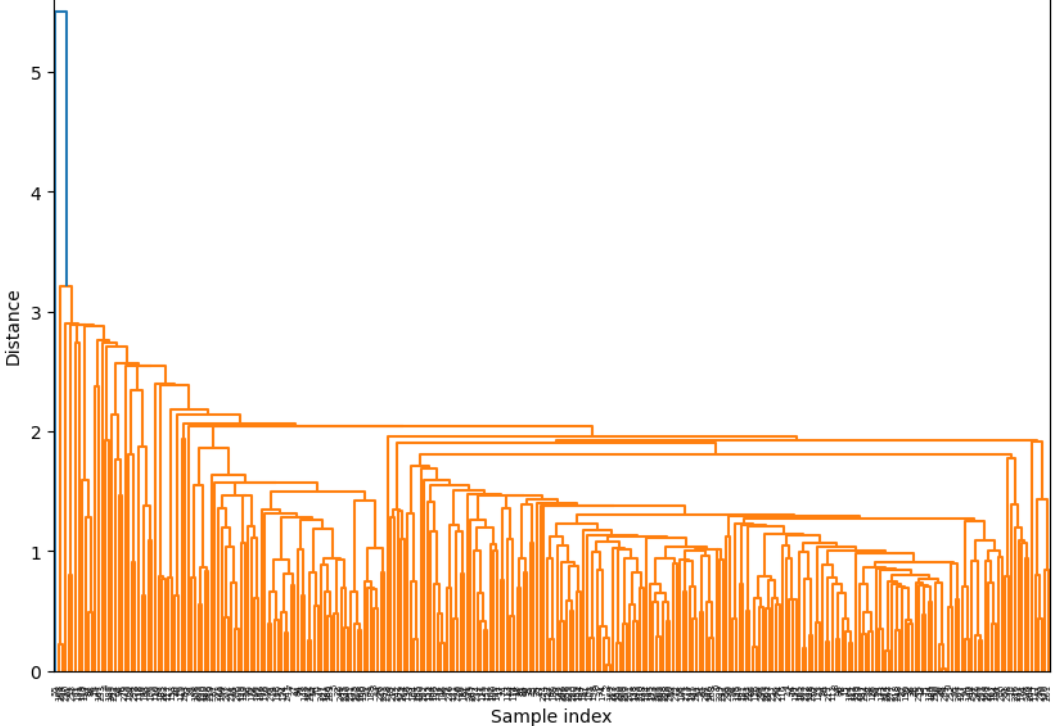
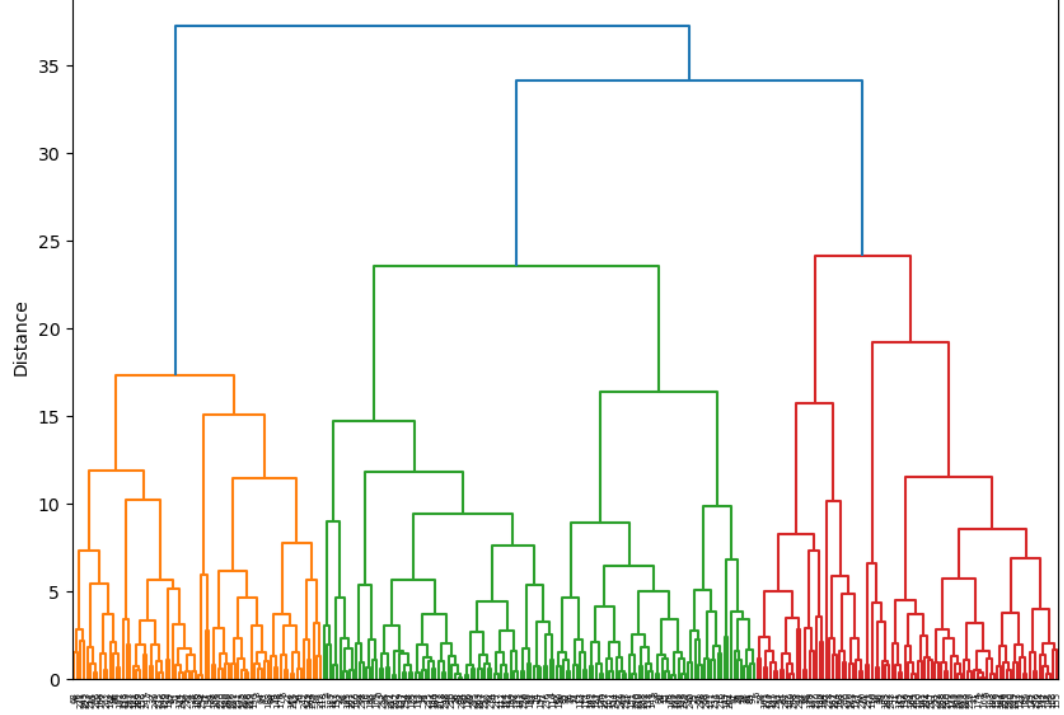
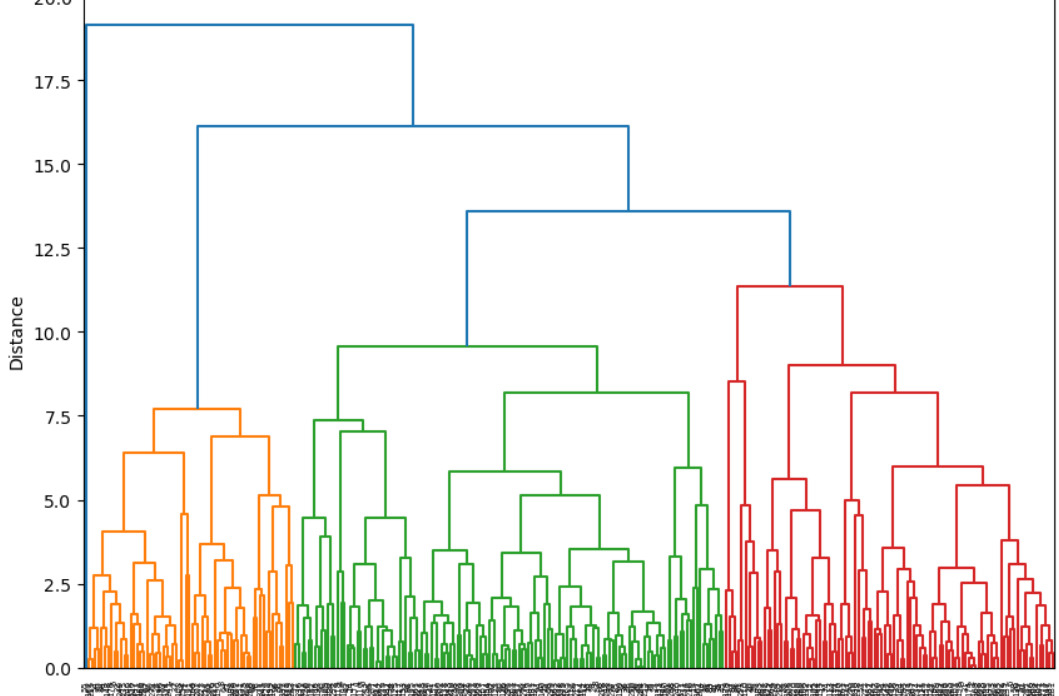
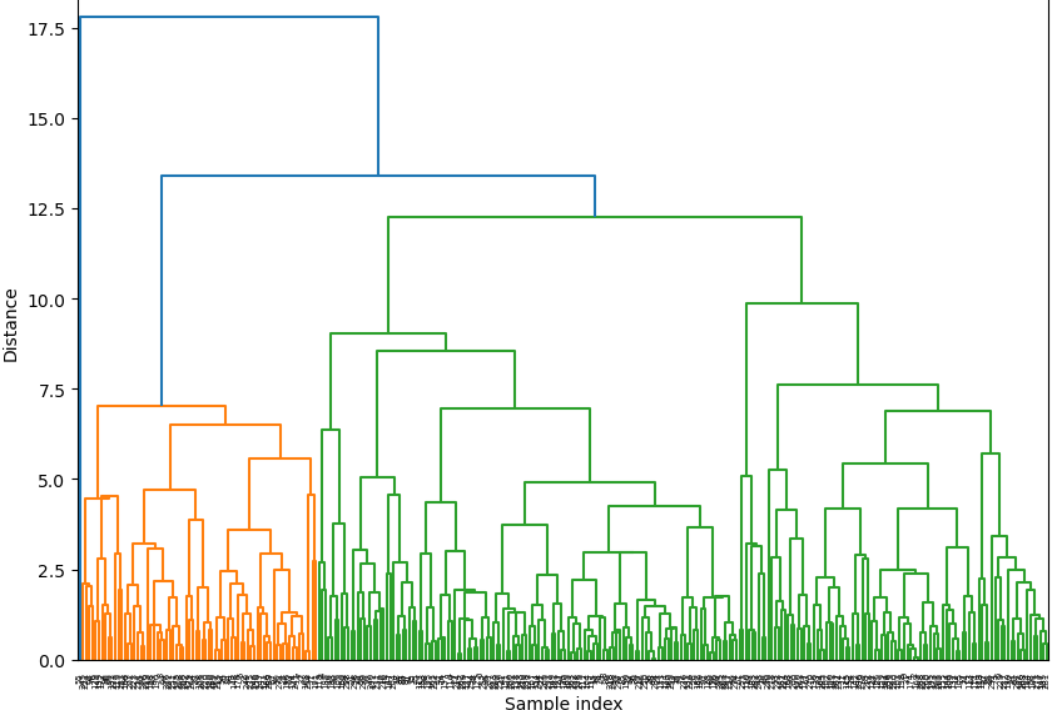

2. What happens to the silhouette score when you change the number of clusters?
3. How does the clustering performance change if you use a different random seed for data generation?

## 2. Visualization and Interpretation of Clusters

We will visualize and interpret the clusters formed by different clustering algorithms. We will also explore different visualization techniques.

c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


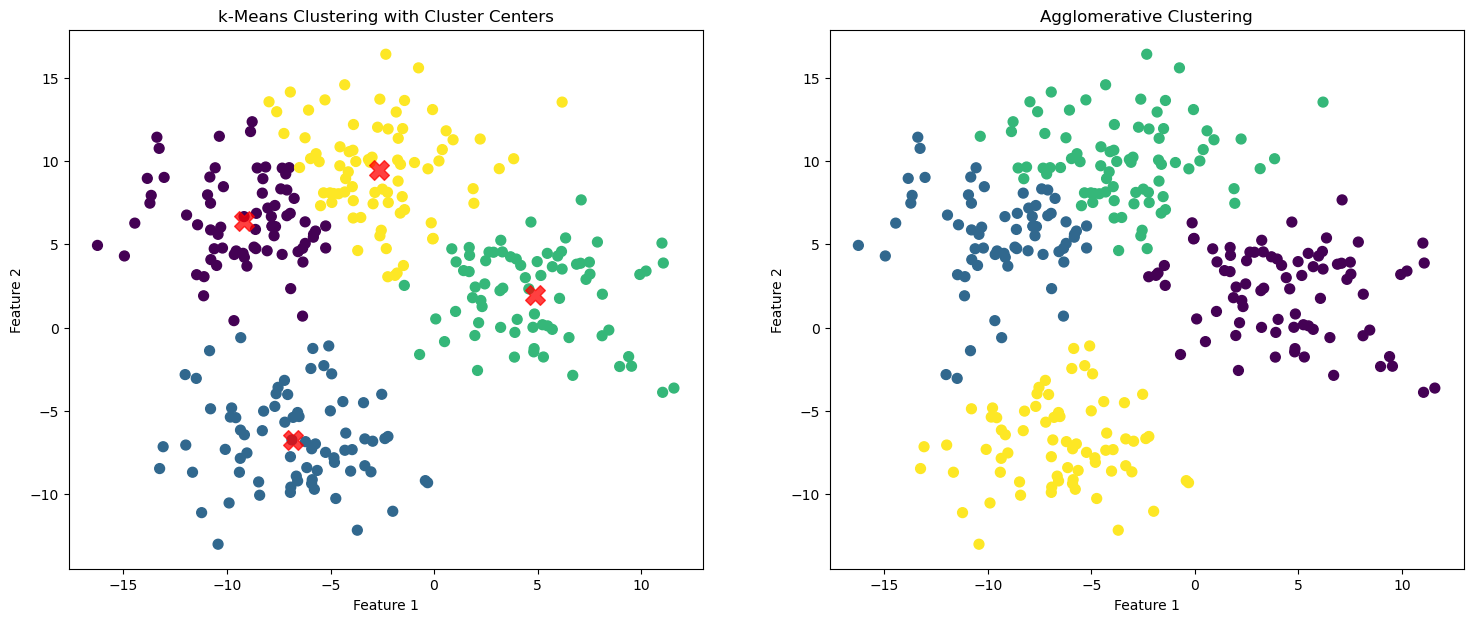

Silhouette Score (k-Means): 0.4757771373951286
Silhouette Score (Agglomerative): 0.4677057112688838


In [70]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=3, random_state=42)

# Train a k-Means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot the k-Means clustering result
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('k-Means Clustering with Cluster Centers')

# Plot the agglomerative clustering result
ax2.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Agglomerative Clustering')

plt.show()

# print the silhouette scores
silhouette_avg_kmeans = silhouette_score(X, y_kmeans)
silhouette_avg_agg = silhouette_score(X, y_agg)
print(f"Silhouette Score (k-Means): {silhouette_avg_kmeans}")
print(f"Silhouette Score (Agglomerative): {silhouette_avg_agg}")


### Questions for Exploration

1. How do the clusters formed by k-Means and agglomerative clustering compare?
2. Another visualization for clustering discussed in class is the silhouette plot - how does this plot change when you make changes to `cluster_std` in `make_blobs`? 
3. How does the choice of features affect the clustering results and their interpretation?

## 3. Hyperparameter Tuning

We will perform hyperparameter tuning to find the best parameters for each clustering algorithm. We will also explore different evaluation metrics.

In [72]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5], 'init':['k-means++', 'random'], 'max_iter':[25, 50, 100, 150]} #how many clusters we want to investigate
# can test whatever parameter dict we want, but more combos == longer it takes to compute
param_grid_agg = {'n_clusters': [2, 3, 4, 5], 'linkage': ['ward', 'complete', 'average']} 

# Perform grid search for agglomerative clustering
def custom_silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Perform grid search for k-Means
grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring=custom_silhouette_scorer)
grid_search_kmeans.fit(X)

grid_search_agg = GridSearchCV(AgglomerativeClustering(), param_grid_agg, cv=5, scoring=custom_silhouette_scorer)
grid_search_agg.fit(X)

# Print best parameters and scores
print(f"Best parameters for k-Means: {grid_search_kmeans.best_params_}")
print(f"Best silhouette score for k-Means: {grid_search_kmeans.best_score_}")

print(f"Best parameters for Agglomerative Clustering: {grid_search_agg.best_params_}")
print(f"Best silhouette score for Agglomerative Clustering: {grid_search_agg.best_score_}")

# made to have 4 clusters, but best GridSearch results have 3 clusters 
# --> maximising performance not always best thing, not properly representing underlying data
# want to triage our rare disease states properly, they can be overlooked in this kind of situation 

# but in practice we might not know that there should be 4 clusters


c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\liv_u\Desktop\GitHu

Best parameters for k-Means: {'init': 'random', 'max_iter': 25, 'n_clusters': 3}
Best silhouette score for k-Means: 0.5385665146368941
Best parameters for Agglomerative Clustering: {'linkage': 'average', 'n_clusters': 3}
Best silhouette score for Agglomerative Clustering: 0.5291438131520306


### Questions for Exploration

1. How does hyperparameter tuning improve the performance of each clustering algorithm?
2. What are the best hyperparameters found for each clustering algorithm, and how do they compare to the default parameters?
3. How does the choice of evaluation metric (e.g., silhouette score) impact the results of hyperparameter tuning?

## Extensions

1. Try implementing an elbow plot or gap statistic plot. Does the plot agree with best parameters obtained using `GridSearchCV`?   


## Recall:
### 🔹 Elbow Method  
The **Elbow Plot** helps determine the optimal number of clusters (**k**) by plotting:  
- **X-axis:** Number of clusters (\(k\))  
- **Y-axis:** Within-Cluster Sum of Squares (WCSS; aka inertia)  
        aka 'inertia' from earlier; a way to ID how tightly packed a cluster is.
        at some point, WCSS might drop dramatically = a good k value to try

#### 🔍 **Interpretation:**  
- **Look for the "elbow"**—the point where the WCSS **stops decreasing sharply**.  
- Before this point, adding clusters significantly reduces WCSS.  starts with 1 cluster == a lot of variance, gradually decreases as you separate into more clusters; we're specifically looking for a rapid decrease in WCSS (WC variance).
- After this point, diminishing returns indicate that additional clusters provide **little extra benefit**. 


In [ ]:
# ELBOW PLOT

def plot_elbow_method(X, max_k=10):
    """
    Plots the elbow method for determining the optimal number of clusters.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    max_k : int, optional, default=10
        The maximum number of clusters to consider.

    Returns:
    None
    """
    inertia = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_range)
    plt.grid()
    plt.show()
    
# Example usage:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=3, random_state=42)
plot_elbow_method(X, max_k=10)


---

### 🔹 Gap Statistic  
The **Gap Statistic Plot** compares the clustering structure in real data to a **randomized reference** distribution. It plots:  
- **X-axis:** Number of clusters (\(k\))  
- **Y-axis:** Gap statistic (higher means better clustering structure)  
        comparing same metric on real data w structure vs data w no structure (eg. TV static)
        --> fitting a model to the real vs to the random.
        Here, we are looking for the maximum.

#### 🔍 **Interpretation:**  
- The **optimal \(k\)** is where the **gap statistic is maximized**.  
- If the gap statistic **plateaus** or **starts decreasing**, adding clusters is unnecessary. 


In [ ]:
# GAP STATISTIC PLOT

def compute_gap_statistic(X, max_k=10, n_references=10):
    """
    Compute the Gap Statistic for k-Means clustering.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    max_k : int, optional, default=10
        The maximum number of clusters to consider.
    n_references : int, optional, default=10
        The number of reference datasets to generate.

    Returns:
    tuple: (gap_values, optimal_k)
        gap_values : list of gap statistics for each k.
        optimal_k : int, the optimal number of clusters.
    """
    gap_values = []
    wcss_values = []
    reference_wcss_values = []

    # Generate reference datasets
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss = kmeans.inertia_
        wcss_values.append(wcss)

        ref_wcss = []
        for _ in range(n_references):
            # Generate random reference data
            random_data = np.random.uniform(X.min(axis=0), X.max(axis=0), size=X.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=42)
            kmeans_ref.fit(random_data)
            ref_wcss.append(kmeans_ref.inertia_)
        reference_wcss_values.append(np.mean(ref_wcss))

        # Compute the gap statistic
        gap = np.log(np.mean(ref_wcss)) - np.log(wcss)
        gap_values.append(gap)

    # Determine the optimal k (where gap statistic is maximized)
    optimal_k = np.argmax(gap_values) + 1

    return gap_values, optimal_k

def plot_gap_statistic(gap_values, max_k):
    """
    Plot the Gap Statistic for k-Means clustering.

    Parameters:
    gap_values : list of gap statistics for each k.
    max_k : int
        The maximum number of clusters considered.

    Returns:
    None
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), gap_values, marker='o')
    plt.title('Gap Statistic for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Gap Statistic')
    plt.xticks(range(1, max_k + 1))
    plt.grid()
    plt.show()

# Example usage:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=4, random_state=42)
gap_values, optimal_k = compute_gap_statistic(X, max_k=10, n_references=10)
print(f"Optimal number of clusters (k): {optimal_k}")
plot_gap_statistic(gap_values, max_k=10)

The above metrics leverage the inertia (or WCSS) from the KMeans implementation. But what about AgglomerativeClustering?

In [ ]:
from sklearn.metrics import silhouette_score

# AVERAGE SILHOUETTE PLOT

def plot_silhouette_method(X, max_k=10):
    """
    Plots the silhouette method for determining the optimal number of clusters.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    max_k : int, optional, default=10
        The maximum number of clusters to consider.

    Returns:
    None
    """
    silhouette_avg_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette_avg_scores, marker='o')
    plt.title('Silhouette Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(k_range)
    plt.grid()
    plt.show()

# Example usage:  
X, y = make_blobs(n_samples=300, centers=4, cluster_std=3, random_state=42)  
plot_silhouette_method(X, max_k=10)